In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import pickle

In [15]:
df=pd.read_csv('../Risk_Prediction/Ayurveda Sheet.csv')

In [16]:
df.head()

,prognosis,Sneezing,Runny_Nose,Headache,High Fever,Bodyache,Blocked_Nose,Tonsils,Throught_Iritation,Fatigue,...,Increased Appetite,Sweating,Hair loss,Photosensitivity,Oral ulcers,Dosha,Risk,Risk for prognosis,Medicine,Unnamed: 78
0,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
1,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
2,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
3,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
4,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN


In [17]:
# Remove duplicate rows
df = df.drop_duplicates()

In [18]:
df.shape

(815, 79)

In [19]:
df.head()

,prognosis,Sneezing,Runny_Nose,Headache,High Fever,Bodyache,Blocked_Nose,Tonsils,Throught_Iritation,Fatigue,...,Increased Appetite,Sweating,Hair loss,Photosensitivity,Oral ulcers,Dosha,Risk,Risk for prognosis,Medicine,Unnamed: 78
0,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
1,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
4,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
5,Allergy,1,1,0,0,0,0,0,0,0,...,0,NaN,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN
8,Allergy,1,1,0,0,0,0,0,0,0,...,0,0.0,0,0,0,"Watha, Kapha",High,NaN,"Turmeric and honey mixture, Ginger tea, Black ...",NaN


In [20]:
df.isnull().sum()

prognosis               0
Sneezing                0
Runny_Nose              0
Headache                0
High Fever              0
                     ... 
Dosha                   0
Risk                    0
Risk for prognosis    763
Medicine                3
Unnamed: 78           795
Length: 79, dtype: int64

In [21]:
df=df.drop(['Medicine','Dosha','Risk','Risk for prognosis','Unnamed: 78'] , axis=1)

In [22]:
df.head()

,prognosis,Sneezing,Runny_Nose,Headache,High Fever,Bodyache,Blocked_Nose,Tonsils,Throught_Iritation,Fatigue,...,Itchy red spots,Painful urination,Frequent urge to urinate,Cloudy or strong-smelling urine,Pelvic pain,Increased Appetite,Sweating,Hair loss,Photosensitivity,Oral ulcers
0,Allergy,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,NaN,0,0,0
1,Allergy,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,0,0,0
4,Allergy,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,NaN,0,0,0
5,Allergy,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,0,0,0
8,Allergy,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0.0,0,0,0


In [23]:
df.isnull().sum()

prognosis             0
Sneezing              0
Runny_Nose            0
Headache              0
High Fever            0
                     ..
Increased Appetite    0
Sweating              4
Hair loss             0
Photosensitivity      0
Oral ulcers           0
Length: 74, dtype: int64

In [25]:
df = df.copy()
df['Sweating'] = df['Sweating'].fillna(0).astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 998
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   prognosis                        815 non-null    object
 1   Sneezing                         815 non-null    int64 
 2   Runny_Nose                       815 non-null    int64 
 3   Headache                         815 non-null    int64 
 4   High Fever                       815 non-null    int64 
 5   Bodyache                         815 non-null    int64 
 6   Blocked_Nose                     815 non-null    int64 
 7   Tonsils                          815 non-null    int64 
 8   Throught_Iritation               815 non-null    int64 
 9   Fatigue                          815 non-null    int64 
 10  Less_of_appetite                 815 non-null    int64 
 11  Eye Redness                      815 non-null    int64 
 12  Lethargy                         815 non-

In [27]:
# Get the number of unique values in the 'prognosis' column
unique_count = df['prognosis'].nunique()
print(unique_count)

20


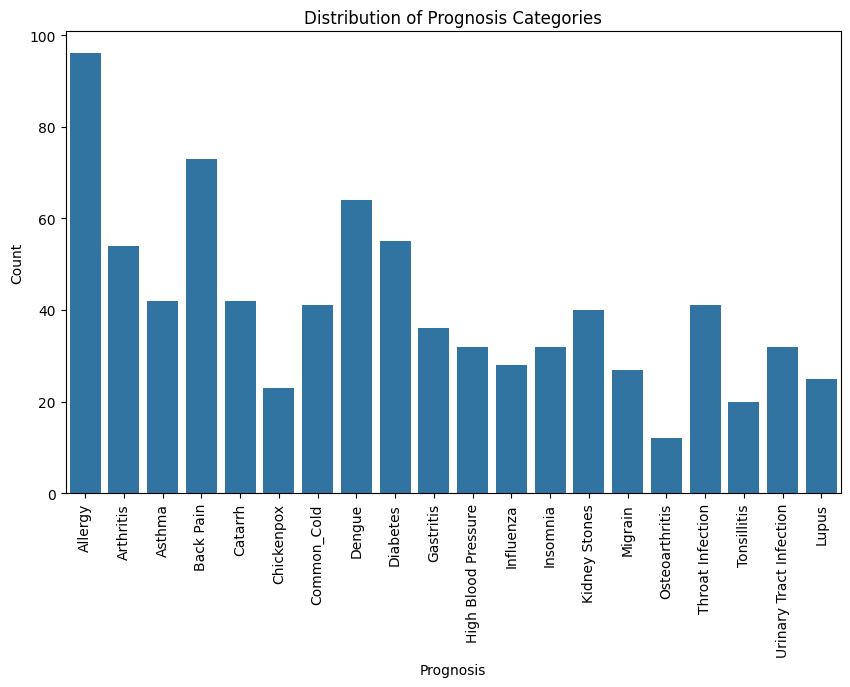

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a bar graph using seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='prognosis', data=df)

# Add titles and labels
plt.title('Distribution of Prognosis Categories')
plt.xlabel('Prognosis')
plt.ylabel('Count')

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [30]:
# Instantiate the label encoder
le = LabelEncoder()

# Fit and transform the response variable
df['prognosis'] = le.fit_transform(df['prognosis'])

# If you need to see the mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(mapping)

{'Allergy': np.int64(0), 'Arthritis': np.int64(1), 'Asthma': np.int64(2), 'Back Pain': np.int64(3), 'Catarrh': np.int64(4), 'Chickenpox': np.int64(5), 'Common_Cold': np.int64(6), 'Dengue': np.int64(7), 'Diabetes': np.int64(8), 'Gastritis': np.int64(9), 'High Blood Pressure': np.int64(10), 'Influenza': np.int64(11), 'Insomnia': np.int64(12), 'Kidney Stones': np.int64(13), 'Lupus': np.int64(14), 'Migrain': np.int64(15), 'Osteoarthritis': np.int64(16), 'Throat Infection': np.int64(17), 'Tonsillitis': np.int64(18), 'Urinary Tract Infection': np.int64(19)}


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 815 entries, 0 to 998
Data columns (total 74 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   prognosis                        815 non-null    int64
 1   Sneezing                         815 non-null    int64
 2   Runny_Nose                       815 non-null    int64
 3   Headache                         815 non-null    int64
 4   High Fever                       815 non-null    int64
 5   Bodyache                         815 non-null    int64
 6   Blocked_Nose                     815 non-null    int64
 7   Tonsils                          815 non-null    int64
 8   Throught_Iritation               815 non-null    int64
 9   Fatigue                          815 non-null    int64
 10  Less_of_appetite                 815 non-null    int64
 11  Eye Redness                      815 non-null    int64
 12  Lethargy                         815 non-null    int64


In [32]:
# 'prognosis' is  target variable 
y = df['prognosis']
X = df.drop(columns=['prognosis'])

In [33]:
from sklearn.model_selection import train_test_split
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
df.isnull().sum()

prognosis             0
Sneezing              0
Runny_Nose            0
Headache              0
High Fever            0
                     ..
Increased Appetite    0
Sweating              0
Hair loss             0
Photosensitivity      0
Oral ulcers           0
Length: 74, dtype: int64

In [35]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train models and evaluate accuracy
accuracy_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

# Convert accuracy scores to a DataFrame for easier plotting
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
accuracy_df['Accuracy (%)'] = accuracy_df['Accuracy'] * 100

In [36]:
# Initialize a dictionary to store classification reports
classification_reports = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)  # output_dict=True for a dict format
    classification_reports[name] = report

# Convert the reports to DataFrames for easy viewing
report_dfs = {}
for name, report in classification_reports.items():
    # Convert the report to DataFrame
    report_df = pd.DataFrame(report).transpose()
    report_df['Model'] = name
    report_dfs[name] = report_df

# Concatenate all DataFrames into one
all_reports_df = pd.concat(report_dfs.values())

E:\Anaconda\envs\Disease_Prediction\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Anaconda\envs\Disease_Prediction\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\Anaconda\envs\Disease_Prediction\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
# Print classification reports for each model
for name, report in classification_reports.items():
    print(f"\nClassification Report for {name}:\n")
    print(pd.DataFrame(report).transpose())


Classification Report for Logistic Regression:

              precision    recall  f1-score    support
0              0.956522  1.000000  0.977778   22.00000
1              1.000000  1.000000  1.000000    9.00000
2              1.000000  1.000000  1.000000    2.00000
3              0.900000  1.000000  0.947368   18.00000
4              0.875000  1.000000  0.933333    7.00000
5              1.000000  1.000000  1.000000    4.00000
6              1.000000  0.600000  0.750000   10.00000
7              1.000000  1.000000  1.000000   12.00000
8              1.000000  1.000000  1.000000   13.00000
9              1.000000  0.714286  0.833333    7.00000
10             1.000000  1.000000  1.000000    5.00000
11             1.000000  1.000000  1.000000    8.00000
12             1.000000  1.000000  1.000000    4.00000
13             1.000000  1.000000  1.000000    9.00000
14             1.000000  1.000000  1.000000    6.00000
15             0.777778  1.000000  0.875000    7.00000
16             1

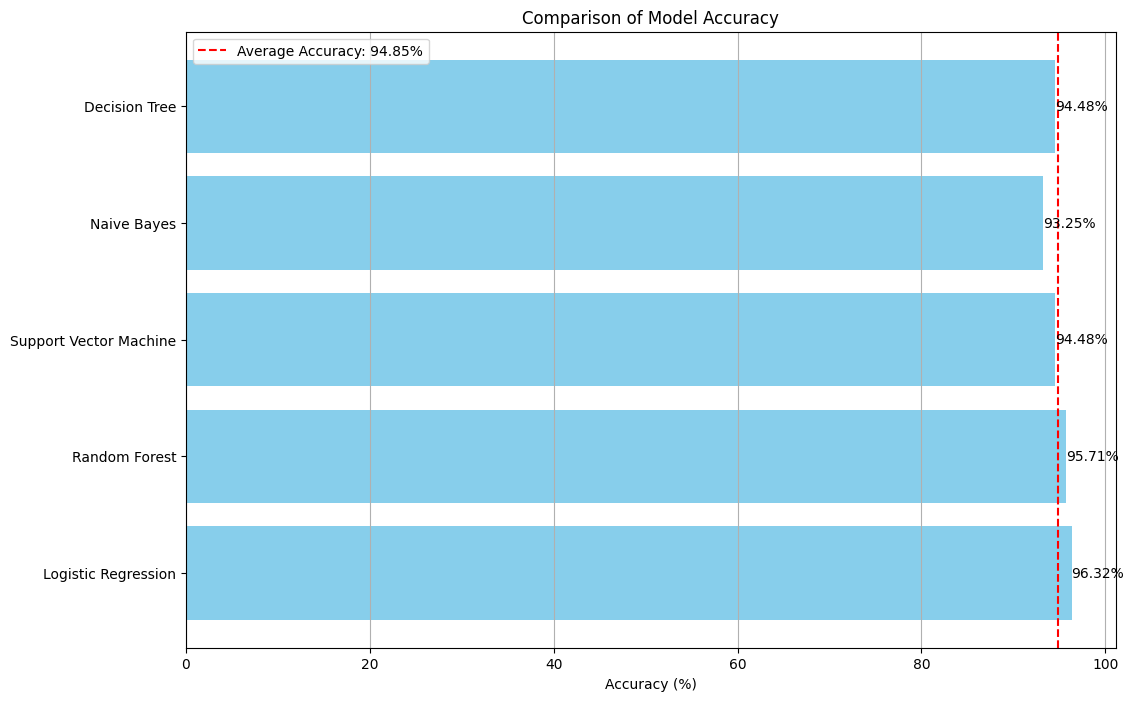

In [38]:
# Plot accuracy scores with percentages
plt.figure(figsize=(12, 8))
bars = plt.barh(accuracy_df['Model'], accuracy_df['Accuracy (%)'], color='skyblue')

# Add percentage labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', 
             va='center', ha='left', color='black')

# Add a horizontal line at the average accuracy
average_accuracy = accuracy_df['Accuracy (%)'].mean()
plt.axvline(x=average_accuracy, color='red', linestyle='--', label=f'Average Accuracy: {average_accuracy:.2f}%')

# Add titles and labels
plt.xlabel('Accuracy (%)')
plt.title('Comparison of Model Accuracy')
plt.legend()
plt.grid(axis='x')

# Show the plot
plt.show()


### Export the Model

In [39]:
logistic_regression_model = models['Logistic Regression']

In [41]:
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump((le, model), file)